<a href="https://colab.research.google.com/github/SamAniedi/linearRegression/blob/main/1_Linear_Regression_ML_Udemy_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Maching Learning csv files/For ML in R and Python Udemy/House_Price.csv")

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(506, 19)

## Running EDD

In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


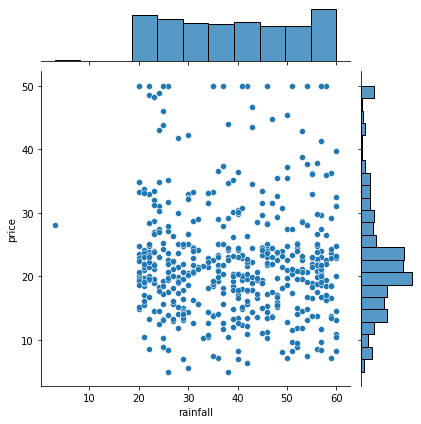

In [ ]:
sns.jointplot(x = 'rainfall', y = 'price', data = df)

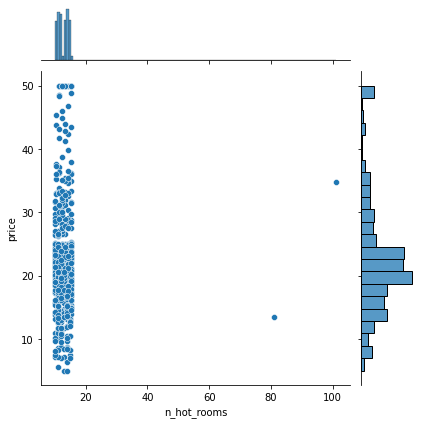

In [ ]:
sns.jointplot(x = 'n_hot_rooms', y = 'price', data =df)

### Categorical Variable(barplot or countplot)

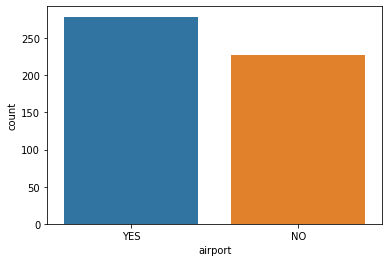

In [ ]:
sns.countplot(x = "airport", data = df)

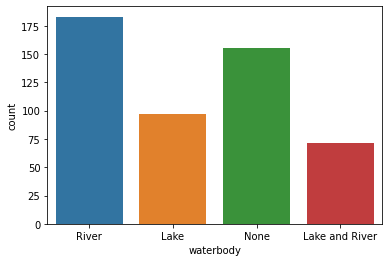

In [ ]:
sns.countplot(x = "waterbody", data = df)

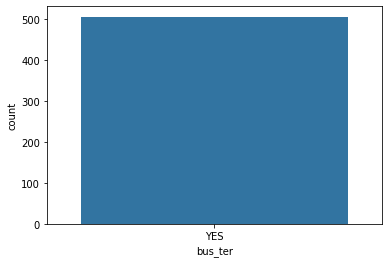

In [ ]:
sns.countplot(x ="bus_ter", data = df)

##### 1. Missing values in n_hos_beds
##### 2. Skewness or outliner in crime rate
##### 3. Outliers in n_hot room and rainfall
##### 4. Bus terminal has only YES variable

In [ ]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [ ]:
np.percentile(df.n_hot_rooms,[99])[0]

15.39952

In [ ]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [ ]:
uv

15.39952

In [ ]:
# How to identify, where the n_hot room is greater than P99
df[(df.n_hot_rooms>uv)]    # below is how to identify outliers in our data
# The figures that are not close to the value of uv are the outliers

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [ ]:
# How to change the values of these variables(outliers)
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Identifying the outliers in rainfall

In [ ]:
np.percentile(df.rainfall,[1])[0]

20.0

In [ ]:
# Since the outlier is in the lower end, create variable lv
lv = np.percentile(df.rainfall,[1])[0]

In [ ]:
# Where df.rainfall is lower than lv
df[(df.rainfall < lv)]   # this is a conditional statement

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [ ]:
# Outlier is 3, so the next conditional statement
df.rainfall[(df.rainfall < 0.3 * lv)]  = 0.3 *lv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


## Missing Values Imputation

In [ ]:
# to get the variables with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [ ]:
# To impute the missing values using the function fillna
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [ ]:
df.info

<bound method DataFrame.info of      price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0     24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1     21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2     34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3     33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4     36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   
..     ...         ...         ...       ...       ...   ...    ...    ...   
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  po

In [ ]:
# To impute all missing values for all variables
#df = df.fillna(df.mean())

## DUMMY VARIABLE CREATION

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,n_hot_rooms,rainfall,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,11.19200,23,0.049347,0,1,0,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,12.17280,42,0.046146,1,0,1,0,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,46.19856,38,0.045764,1,0,0,0,1,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,11.26720,45,0.047151,0,1,1,0,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,11.28960,55,0.039474,1,0,1,0,0,0,1


In [ ]:
# to delete the excess data after getting the dummies, i.e data that convey the same msg, like airport_NO and airport_YES
del df ["airport_NO"]

In [ ]:

del df["waterbody_None"]

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,4.98,5.480,11.19200,23,0.049347,1,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,9.14,7.332,12.17280,42,0.046146,0,1,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,4.03,7.394,46.19856,38,0.045764,0,0,0,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,2.94,9.268,11.26720,45,0.047151,1,1,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,5.33,8.824,11.28960,55,0.039474,0,1,0,0,1


## CORELATION ANALYSIS


In [ ]:
# to write the correlation analysis
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,...,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.182867,0.036233,-0.037497,0.071751,NaN
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,...,0.455621,0.017371,0.032927,0.059090,0.383235,-0.086805,-0.016894,-0.018150,-0.037123,NaN
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,...,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.115401,-0.026590,0.051649,-0.098976,NaN
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,...,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.073903,-0.046393,0.013849,-0.037772,NaN
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,...,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.163774,-0.004195,0.010554,0.046251,NaN
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,...,0.602339,-0.021012,0.013918,0.074684,0.673850,0.005101,0.003452,-0.004354,-0.088609,NaN
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,...,-0.498823,-0.030365,-0.025398,-0.036812,-0.706319,0.025208,0.035171,-0.023236,0.030763,NaN
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,...,-0.495693,-0.031071,-0.021263,-0.037990,-0.708237,0.020056,0.038965,-0.024103,0.030566,NaN
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,...,-0.494290,-0.028315,-0.019994,-0.041475,-0.709346,0.020195,0.033510,-0.023102,0.033634,NaN
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,...,-0.496084,-0.021534,-0.016003,-0.032596,-0.703508,0.020022,0.031696,-0.014671,0.033829,NaN


In [ ]:
# look for high correlation and delete one of the variable, leave the one that is mostly understandable
del df["parks"]

In [ ]:
df.corr

<bound method DataFrame.corr of      price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0     24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1     21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2     34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3     33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4     36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   
..     ...         ...         ...       ...       ...   ...    ...    ...   
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  po

# SIMPLE LINEAR REGRESSION

In [ ]:
import statsmodels.api as sn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# statsmodel does not come with the linear regression formular(Y = B0 + B1X) so to insert it here
X = sn.add_constant(df["room_num"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# to fit the model
lm = sn.OLS(df["price"], X).fit()

In [ ]:
# to get the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.31e-74
Time:                        10:54:04   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SIMPLE LINEAR REGRESSION USING SCIKIT LEARN

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# to find the x and y variables
y = df["price"]
x = df[["room_num"]]

In [ ]:
# to create linear regression before fitting the model
lm2 = LinearRegression()

In [ ]:

# to fit our model
lm2.fit(x,y)

LinearRegression()

In [ ]:
# to see the intercept and the coefficient
print(lm2.intercept_, lm2.coef_)

-34.6592431230972 [9.09966966]


In [ ]:
# for more enquiry use help
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [ ]:
# to predict the value of y depending on the model
lm2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [ ]:
# to plot the regression line use help first
help(sns.jointplot)


Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

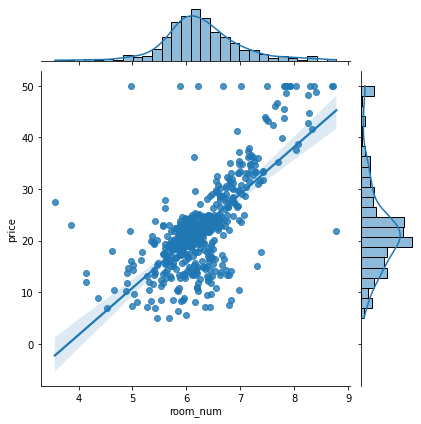

In [ ]:
sns.jointplot(x = df["room_num"], y = df["price"], data = df, kind = "reg")

# MULTIPLE LINEAR REGRESSION IN PYTHON

In [ ]:
# To get started we need to create the X and Y variable
x_multi =df.drop("price", axis = 1)

In [ ]:
x_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.19200,23,1,0,0,1,1
1,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.17280,42,0,1,0,0,1
2,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,46.19856,38,0,0,0,0,1
3,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.26720,45,1,1,0,0,1
4,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.28960,55,0,1,0,0,1


In [ ]:
y_multi = df["price"]

In [ ]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [ ]:
# We need to add constant to our data, by default our B0 which is the constant is 0
x_multi_cons = sn.add_constant(x_multi)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x_multi_cons.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.19200,23,1,0,0,1,1
1,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.17280,42,0,1,0,0,1
2,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,46.19856,38,0,0,0,0,1
3,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.26720,45,1,1,0,0,1
4,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.28960,55,0,1,0,0,1


In [ ]:

# to fit our model
lm_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [ ]:
# to view the model
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     71.32
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          8.40e-124
Time:                        10:54:19   Log-Likelihood:                -1512.8
No. Observations:                 506   AIC:                             3064.
Df Residuals:                     487   BIC:                             3144.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
crime_rate                  -0.0760      0.030     -2.541      0.011      -0.135      -0.017
resid_area                  -0.0387      0.057     -0.678      0.498      -0.151       0.073
air_qual                   -14.6949      3.735     -3.934      0.000     -22.033      -7.356
room_num                     4.1276      0.420      9.818      0.000       3.302       4.954
age                         -0.0085      0.014     -0.629      0.530      -0.035       0.018
dist1                       -0.3193      1.845     -0.173      0.863      -3.944       3.305
dist2                        1.2881      1.973      0.653      0.514      -2.589       5.165
dist3                       -2.0380      1.914     -1.065      0.287      -5.799       1.723
dist4                       -0.1701      1.033     -0.165      0.869      -2.199       1.859
teachers                     0.9607      0.119      8.106      0.000       0.728       1.194
poor_prop                   -0.5431      0.052    -10.477      0.000      -0.645      -0.441
n_hos_beds                   0.3551      0.152      2.331      0.020       0.056       0.654
n_hot_rooms                  0.0975      0.082      1.188      0.236      -0.064       0.259
rainfall                     0.0162      0.018      0.908      0.364      -0.019       0.051
airport_YES                  1.0780      0.452      2.386      0.017       0.190       1.966
waterbody_Lake               0.2121      0.641      0.331      0.741      -1.047       1.471
waterbody_Lake and River    -0.7806      0.714     -1.093      0.275      -2.183       0.622
waterbody_River             -0.2775      0.545     -0.509      0.611      -1.349       0.794
bus_ter_YES                 -6.4747      5.221     -1.240      0.216     -16.733       3.784
==============================================================================
Omnibus:                      200.469   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.609
Skew:                           1.698   Prob(JB):                    1.16e-213
Kurtosis:                       8.914   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# USING SCI-KIT LEARN LIBRARY FOR MULTI_LINEAR REGRESSION

In [ ]:
# sklearn already imported

In [ ]:
# To create our object
lm3 = LinearRegression()

In [ ]:
# to fit our model,NOTE: we dont need another variable with a constant sign in sklearn
lm3.fit(x_multi, y_multi)

LinearRegression()

In [ ]:
# to get the coefficients
print(lm3.intercept_, lm3.coef_)

-6.474686672247884 [-7.60430794e-02 -3.86859340e-02 -1.46948687e+01  4.12756970e+00
 -8.51075110e-03 -3.19278558e-01  1.28811353e+00 -2.03799201e+00
 -1.70067145e-01  9.60699740e-01 -5.43118483e-01  3.55092843e-01
  9.75446931e-02  1.61951800e-02  1.07802776e+00  2.12069225e-01
 -7.80583566e-01 -2.77478689e-01  0.00000000e+00]


# Test Train Split

In [ ]:
# import test train from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# to use this function, we need to define our 4 variables, i.e our independent train variable, independent test variable, dependent train variable and dependent test variable
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state= 0)

In [ ]:
# to get the number of rows and columns in our training set
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 19) (102, 19) (404,) (102,)


In [ ]:
# Now follow the standard process of creating a linear regression model
# First of all create the linear regression object, better known as instantiation
lm_a = LinearRegression()

In [ ]:
# Now we will train our model from our training set
lm_a.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Create the predicted value of y using this model
# Here we are predicting our test dependable variable
y_test_a = lm_a.predict(x_test)


In [ ]:
# Now to get the predicted value of our training set
y_train_a = lm_a.predict(x_train)

In [ ]:
# Now to check the R Square value for our training and test data
# We will need to import another function
from sklearn.metrics import r2_score

In [ ]:
# To learn more
r2_score?


In [ ]:
# Now to get the R Square value
r2_score(y_test, y_test_a)

0.5553949332010877

###### That is the value of R Square

In [ ]:
# Now to get the R Square value for our training set
r2_score(y_train, y_train_a)

0.7607955769328606

##### Our test Rsquare value is more important than the training R Square value
##### We should always look at our test score instead of training R square values to evaluate the performance of our model

# RIDGE AND LASSO(OTHER REGRESSION MODELS)

In [ ]:
# first of all lets standardize our data before running ridge and lasso
# To standardize the data we need to import preprocessing
from sklearn import preprocessing

In [ ]:
# Next we create scaler object which will store the scalling information for our x variable
scaler = preprocessing.StandardScaler().fit(x_train)

In [ ]:
# Transform x_train to x_train scale
x_train_s = scaler.transform(x_train)

# Tranform test also
x_test_s = scaler.transform(x_test)

#### RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# to run a simple ridge regression
# first create the object for the ridge regression, and insert lamda or alpha as referred to in python
lm_r = Ridge(alpha = 0.5)
lm_r.fit(x_train_s, y_train)


Ridge(alpha=0.5)

In [ ]:
# to find the R square value on our test data
r2_score(y_test, lm_r.predict(x_test_s))

0.5552332259502274

In [ ]:
# we can also change the value of lambda or alpha while running ridge regression, to get the optimal value
# import validation from sklearn
from sklearn.model_selection import validation_curve


In [ ]:
validation_curve?

In [ ]:
# first let create an array of our lambda value
param_range = np.logspace(-2,8,100)

In [ ]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

#### we will use the values above as the values of lambda for our model, to select the best lambda value for the model

In [ ]:
# let run the iterations for our model
# note from signature of validation curve
train_scores, test_scores = validation_curve(Ridge(), x_train_s, y_train, param_name = "alpha", param_range = param_range, scoring = 'r2')

In [ ]:
print(train_scores)
print(test_scores)

[[7.52544553e-01 7.68786560e-01 7.55661950e-01 7.87780210e-01
  7.51954089e-01]
 [7.52544504e-01 7.68786515e-01 7.55661867e-01 7.87779989e-01
  7.51953892e-01]
 [7.52544427e-01 7.68786444e-01 7.55661737e-01 7.87779642e-01
  7.51953583e-01]
 [7.52544307e-01 7.68786332e-01 7.55661533e-01 7.87779099e-01
  7.51953100e-01]
 [7.52544119e-01 7.68786159e-01 7.55661214e-01 7.87778254e-01
  7.51952349e-01]
 [7.52543828e-01 7.68785890e-01 7.55660719e-01 7.87776947e-01
  7.51951186e-01]
 [7.52543377e-01 7.68785475e-01 7.55659954e-01 7.87774936e-01
  7.51949401e-01]
 [7.52542688e-01 7.68784840e-01 7.55658782e-01 7.87771871e-01
  7.51946683e-01]
 [7.52541642e-01 7.68783880e-01 7.55657001e-01 7.87767249e-01
  7.51942588e-01]
 [7.52540074e-01 7.68782442e-01 7.55654326e-01 7.87760367e-01
  7.51936502e-01]
 [7.52537753e-01 7.68780321e-01 7.55650362e-01 7.87750276e-01
  7.51927594e-01]
 [7.52534375e-01 7.68777242e-01 7.55644580e-01 7.87735748e-01
  7.51914799e-01]
 [7.52529553e-01 7.68772862e-01 7.556363

#### Interpretation: for each value of lambda we are getting 3 values of R Square, because the validation curve is running a full validation behind the  scene

In [ ]:
#let take a mean score of this 3 values
train_mean = np.mean(train_scores, axis = 1)

In [ ]:
test_mean = np.mean(test_scores, axis = 1)

In [ ]:
train_mean

array([7.63345472e-01, 7.63345353e-01, 7.63345167e-01, 7.63344874e-01,
       7.63344419e-01, 7.63343714e-01, 7.63342629e-01, 7.63340973e-01,
       7.63338472e-01, 7.63334742e-01, 7.63329261e-01, 7.63321349e-01,
       7.63310164e-01, 7.63294729e-01, 7.63274006e-01, 7.63247020e-01,
       7.63213023e-01, 7.63171664e-01, 7.63123118e-01, 7.63068112e-01,
       7.63007821e-01, 7.62943646e-01, 7.62876918e-01, 7.62808562e-01,
       7.62738769e-01, 7.62666651e-01, 7.62589825e-01, 7.62503866e-01,
       7.62401515e-01, 7.62271548e-01, 7.62097180e-01, 7.61853839e-01,
       7.61506140e-01, 7.61003784e-01, 7.60276073e-01, 7.59224628e-01,
       7.57713881e-01, 7.55559139e-01, 7.52512652e-01, 7.48249442e-01,
       7.42356641e-01, 7.34332413e-01, 7.23602168e-01, 7.09559223e-01,
       6.91632551e-01, 6.69375309e-01, 6.42556517e-01, 6.11230237e-01,
       5.75758415e-01, 5.36777924e-01, 4.95123653e-01, 4.51735567e-01,
       4.07578487e-01, 3.63588860e-01, 3.20643965e-01, 2.79538607e-01,
      

In [ ]:
# we are only intrested in the model that have the highest R square value
max(test_mean)

0.7419132017758727

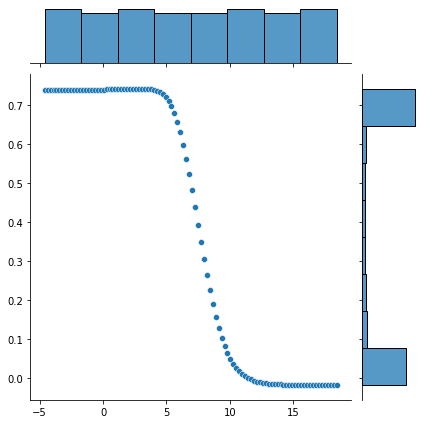

In [ ]:
# Another way to see the Rsquare value of this data is to plot a graph
sns.jointplot(x = np.log(param_range), y = test_mean)

In [ ]:
# next objective is to find the point of highest Rsquare value from the graph
# to find the location
np.where(test_mean==max(test_mean))

(array([32]),)

In [ ]:
# it is at the 32 lenght
# let find the lambda value of 32 length
param_range[32]

17.073526474706906

In [ ]:
# we will fit our model again for this lambda value
lm_r_best = Ridge(alpha = param_range[32])

In [ ]:
# to fit this in our training data set
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=17.073526474706906)

In [ ]:
# let find the Rsquare value on our test data
r2_score(y_test, lm_r_best.predict(x_test_s))

0.552818229928639

In [ ]:
# for our train data
r2_score(y_train, lm_r_best.predict(x_train_s))

0.759732054067384